In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
import os
import pickle
import utils
import matplotlib.tri as tri
from matplotlib import rc
import matplotlib.pylab as plt


In [2]:
with open('../result_log/FINALPREDS-1.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
print(list(data.keys()))

['d1poisson_dv11_2pi', 'd1poisson_dv36_2pi', 'd1poisson_dv37_2pi', 'd2poisson_dv1_2pi', 'd2poisson_dv3_2pi', 'd2allencahn_dv11_2pi', 'd1advection_dv38_2pi', 'd1poisson_dv11_1', 'd1poisson_dv36_1_5000', 'd1poisson_dv36_1_10000', 'd1poisson_dv37_1', 'd2allencahn_dv11_1']


In [9]:
def get_the_best_preds(data, key):
    result = data[key]
    seeds = list(result.keys())
    best_seed = seeds[0]
    for seed in seeds:
        if result[seed]['finallerror'] < result[best_seed]['finallerror']:
            best_seed = seed
    return result[best_seed]['preds']


In [35]:
x=np.linspace(0,1,10)
y=np.linspace(0,1,10)
X,Y=np.meshgrid(x,y)
xy=np.concatenate((X.reshape(-1,1),Y.reshape(-1,1)), axis=1)

In [50]:
data['d2allencahn_dv11_1'].keys()

dict_keys([6539158, 5042346, 5257737, 3021630, 8780719])

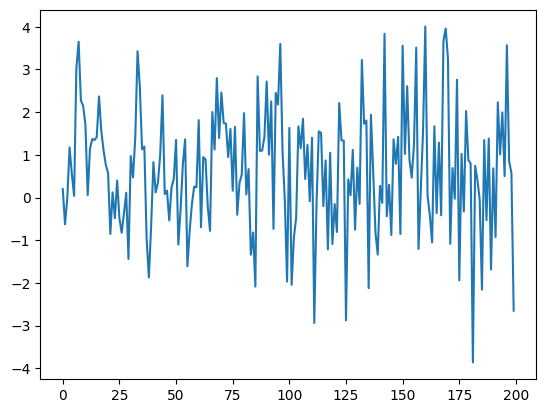

In [49]:
plt.plot(data['d1poisson_dv36_1_5000'][3021630]['preds'][::10])

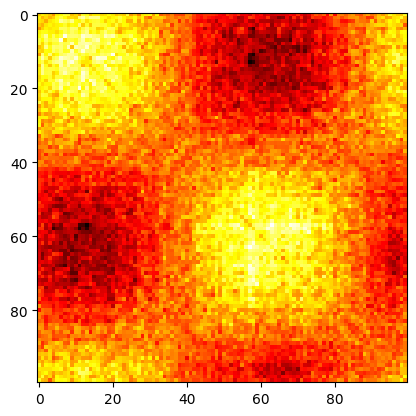

In [53]:
plt.imshow(data['d2allencahn_dv11_1'][6539158]['preds'].reshape(100,100), cmap='hot', interpolation='nearest')

In [2]:

equation_dict = {
    'poisson_2d-sin_cos':'u = sin(100x)cos(100y)',
    'poisson_2d-sin_sin':'u = sin(100x)sin(100y)',
    'poisson_2d-sin_add_cos': 'u= sin(6x)sin(20x) + sin(6y)sin(20y) ',
    'allencahn_2d-mix-sincos':'u= (sin(x) + 0.1sin(20x) + cos(100x)) * (sin(y) + 0.1sin(20y) + cos(100y))',
    'advection-sin':'u = sin(x-200t)'
    }


def load_and_predict_2d(prefix, save_name,N_col=200,scale=1):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, log_dict, trick_paras = pickle.load(f)
    if 'N_col' not in list(trick_paras.keys()):
        trick_paras['N_col'] = N_col

    if 'scale' not in list(trick_paras.keys()):
        trick_paras['scale'] = scale

    model, preds = utils.get_model_2d(params, trick_paras)

    return model, preds, log_dict

def load_and_predict_advection(prefix, save_name):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, log_dict, trick_paras = pickle.load(f)

    model, preds = utils.get_model_2d_advection(params, trick_paras)

    return model, preds, log_dict

def get_err(model, preds):
    err = np.sqrt((np.square(preds-model.ute)))
    return err


def draw_fig(model, preds, log_dict):

    err = min(log_dict['err_list'])
    equation_name =model.trick_paras['equation']
    kernel_name = model.cov_func.__class__.__name__

    # generate new figure
    plt.figure(figsize=(6, 6))

    plt.imshow(preds, cmap="hot")

    # print eq name, kernel_name and err as title
    plt.title('Equation: {}, \n Kernel: {},   L2 Err: {:.2e}'.format(equation_dict[equation_name], kernel_name, err))

    # to save figure
    prefix = '../figs/' + equation_name + '/' + 'Q-%d'%(model.trick_paras['Q']) + '/'

    # create folder if not exist
    if not os.path.exists(prefix):
        os.makedirs(prefix)

    # save as pdf and png
    plt.savefig(prefix + kernel_name + '.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(prefix +kernel_name+ '.png', dpi=300, bbox_inches='tight')

def draw_error_fig(model, preds, log_dict):

    err = min(log_dict['err_list'])
    equation_name =model.trick_paras['equation']
    kernel_name = model.cov_func.__class__.__name__

    # generate new figure
    plt.figure(figsize=(6, 6))
        # set no ticks
    plt.xticks([])
    plt.yticks([])


    # plt.title('ground-truth-2d-2d')
    # print eq name, kernel_name and err as title
    # plt.title('2d-Equation: {},\n ground-truth-'.format(equation_dict[equation_name]))


    err=np.sqrt(np.square(preds-model.ute))

    plt.imshow(err, cmap="hot")

    plt.colorbar(
    location='top', 
    ticks=[err.min(), err.max()],
    shrink=0.8,
)


    # to save figure
    prefix = '../figs/' + equation_name + '/' + 'Q-%d'%(model.trick_paras['Q']) + '/'

    # create folder if not exist
    if not os.path.exists(prefix):
        os.makedirs(prefix)

    # save as pdf and png
    plt.savefig(prefix + kernel_name + '_error.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(prefix +kernel_name+ '_error.png', dpi=300, bbox_inches='tight')


def draw_truth(model):
    equation_name =model.trick_paras['equation']

    plt.figure(figsize=(6, 6))
    plt.imshow(model.ute, cmap="hot")

    # set no ticks
    plt.xticks([])
    plt.yticks([])


    # plt.title('ground-truth-2d-2d')
    # print eq name, kernel_name and err as title
    # plt.title('2d-Equation: {},\n ground-truth-'.format(equation_dict[equation_name]))
    plt.colorbar(
    location='top', 
    ticks=[model.ute.min(), model.ute.max()],
    shrink=0.8,
)

        # to save figure
    prefix = '../figs/' + equation_name + '/' + 'Q-%d'%(model.trick_paras['Q']) + '/'

    # create folder if not exist
    if not os.path.exists(prefix):
        os.makedirs(prefix)
        # save as pdf and png
    plt.savefig(prefix + 'truth.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(prefix + 'truth.png', dpi=300, bbox_inches='tight')


equation is:  advection-sin
kernel is: Matern52_Cos_1d
equation is:  advection-sin
kernel is: SE_Cos_1d
equation is:  advection-sin
kernel is: SE_1d
equation is:  advection-sin
kernel is: Matern52_1d


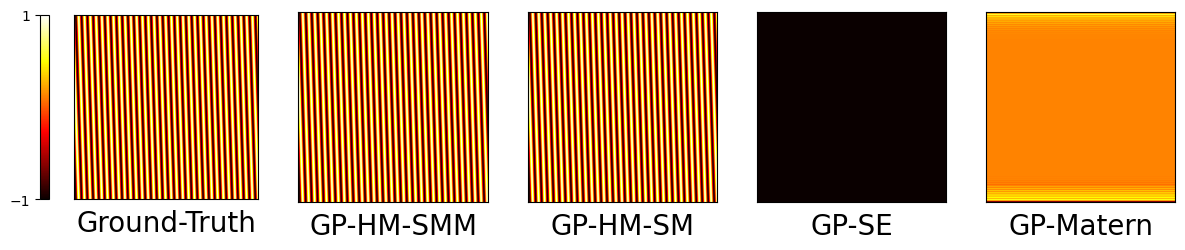

In [7]:
# for advection (x in [0, 2pi])
kernel_list = ['Matern52_Cos_1d','SE_Cos_1d','SE_1d','Matern52_1d']
label_list = ['GP-HM-SMM','GP-HM-SM','GP-SE','GP-Matern']

# prefix = '../result_log/poisson_1d-sin_cos/kernel_Matern52_Cos_1d/epoch_1000000/Q30/'
save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=50-logdet-1-x-2pi-beta-200'

pred_list = []

for kernel_name in kernel_list:
    prefix = '../result_log/advection-sin/kernel_%s/epoch_1000000/Q30/'%(kernel_name)

    model, preds,log_dict = load_and_predict_advection(prefix, save_name)
    preds = np.nan_to_num(preds)
    pred_list.append(preds)

pred_all = np.concatenate(
    pred_list
)

pred_min = pred_all.min()
pred_max = pred_all.max()
# err_norm = err_max-err_min

imgs = []

fig, axs = plt.subplots(1,5, figsize=(15,3),gridspec_kw={'width_ratios': [1.3, 1,1,1,1]})


img =axs[0].imshow(model.ute, cmap="hot")
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel('Ground-Truth',fontsize=20)

imgs.append(img)

for i, kernel_name in enumerate(kernel_list):
    img = axs[i+1].imshow(pred_list[i], cmap="hot")
    # img = axs[i+1].imshow(pred_list[i], cmap="jet")

    axs[i+1].set_xticks([])
    axs[i+1].set_yticks([])
    axs[i+1].set_xlabel(label_list[i],fontsize=20)

    imgs.append(img)

fig.colorbar(
    imgs[0], 
    ax=axs[0],
    location='left', 
    ticks=[model.ute.min(), model.ute.max()],
    shrink=0.8,
)
# fig.colorbar(
#     imgs[2], 
#     ax=axs[1:5],
#     location='top', 
#     ticks=[pred_min, pred_max],
#     shrink=0.2,
# )
equation_name =model.trick_paras['equation']
prefix = '../figs/' + equation_name + '/' 
if not os.path.exists(prefix):
    os.makedirs(prefix)
plt.savefig(prefix + 'pred_sum.pdf', dpi=300, bbox_inches='tight')
plt.savefig(prefix + 'pred_sum.png', dpi=300, bbox_inches='tight')

equation is:  poisson_2d-sin_add_cos
kernel is: Matern52_Cos_1d
equation is:  poisson_2d-sin_add_cos
kernel is: SE_Cos_1d
equation is:  poisson_2d-sin_add_cos
kernel is: SE_1d
equation is:  poisson_2d-sin_add_cos
kernel is: Matern52_1d


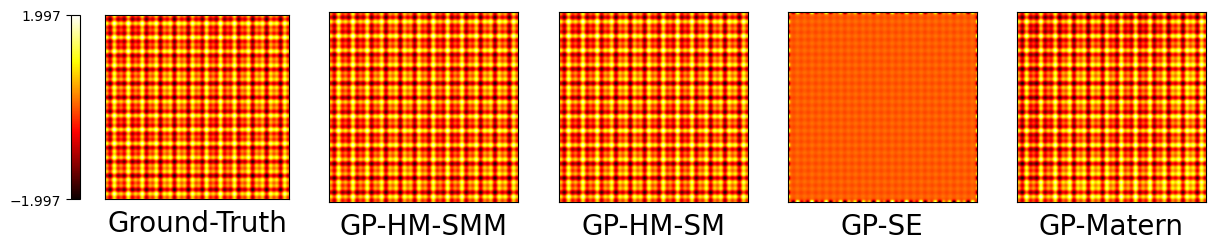

In [9]:
# for advection (x in [0, 2pi])
kernel_list = ['Matern52_Cos_1d','SE_Cos_1d','SE_1d','Matern52_1d']
label_list = ['GP-HM-SMM','GP-HM-SM','GP-SE','GP-Matern']

save_name ='llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=30-logdet-1-x-2pi'

pred_list = []

for kernel_name in kernel_list:
    prefix = '../result_log/poisson_2d-sin_add_cos/kernel_%s/epoch_1000000/Q30/'%(kernel_name)

    model, preds,log_dict = load_and_predict_2d(prefix, save_name)
    preds = np.nan_to_num(preds)
    pred_list.append(preds)

pred_all = np.concatenate(
    pred_list
)

pred_min = pred_all.min()
pred_max = pred_all.max()
# err_norm = err_max-err_min

imgs = []

fig, axs = plt.subplots(1,5, figsize=(15,3),gridspec_kw={'width_ratios': [1.3, 1,1,1,1]})


img =axs[0].imshow(model.ute, cmap="hot")
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel('Ground-Truth',fontsize=20)

imgs.append(img)

for i, kernel_name in enumerate(kernel_list):
    img = axs[i+1].imshow(pred_list[i], cmap="hot")
    # img = axs[i+1].imshow(pred_list[i], cmap="jet")

    axs[i+1].set_xticks([])
    axs[i+1].set_yticks([])
    axs[i+1].set_xlabel(label_list[i],fontsize=20)

    imgs.append(img)

fig.colorbar(
    imgs[0], 
    ax=axs[0],
    location='left', 
    ticks=[model.ute.min(), model.ute.max()],
    shrink=0.8,
)
# fig.colorbar(
#     imgs[2], 
#     ax=axs[1:5],
#     location='top', 
#     ticks=[pred_min, pred_max],
#     shrink=0.2,
# )
equation_name =model.trick_paras['equation']
prefix = '../figs/' + equation_name + '/' 
if not os.path.exists(prefix):
    os.makedirs(prefix)
plt.savefig(prefix + 'pred_sum.pdf', dpi=300, bbox_inches='tight')
plt.savefig(prefix + 'pred_sum.png', dpi=300, bbox_inches='tight')

equation is:  poisson_2d-sin_sin
kernel is: Matern52_Cos_1d
equation is:  poisson_2d-sin_sin
kernel is: SE_Cos_1d
equation is:  poisson_2d-sin_sin
kernel is: SE_1d
equation is:  poisson_2d-sin_sin
kernel is: Matern52_1d


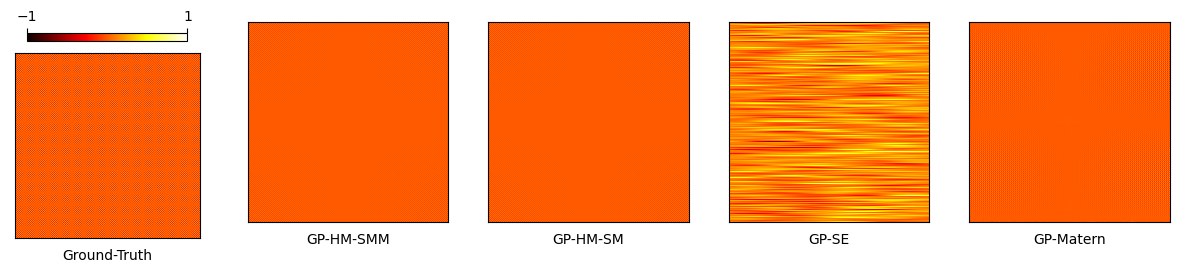

In [26]:
# for poission2d-sin_sin (x in [0, 2pi])
kernel_list = ['Matern52_Cos_1d','SE_Cos_1d','SE_1d','Matern52_1d']
label_list = ['GP-HM-SMM','GP-HM-SM','GP-SE','GP-Matern']

pred_list = []

save_name ='llk_weight-200.0-nu-1-Q-30-epoch-100000-lr-0.0100-freqscale=20-logdet-1-x-2pi-Ncol-400'

for kernel_name in kernel_list:
    prefix = '../result_log/poisson_2d-sin_sin/kernel_%s/epoch_100000/Q30/'%(kernel_name)

    model, preds,log_dict = load_and_predict_2d(prefix, save_name)
    preds = np.nan_to_num(preds)
    pred_list.append(preds)

pred_all = np.concatenate(
    pred_list
)

pred_min = pred_all.min()
pred_max = pred_all.max()
# err_norm = err_max-err_min

imgs = []

fig, axs = plt.subplots(1,5, figsize=(15,3))


img =axs[0].imshow(model.ute, cmap="hot")
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel('Ground-Truth')

imgs.append(img)

for i, kernel_name in enumerate(kernel_list):
    img = axs[i+1].imshow(pred_list[i], cmap="hot")
    # img = axs[i+1].imshow(pred_list[i], cmap="jet")

    axs[i+1].set_xticks([])
    axs[i+1].set_yticks([])
    axs[i+1].set_xlabel(label_list[i])

    imgs.append(img)

fig.colorbar(
    imgs[0], 
    ax=axs[0],
    location='top', 
    ticks=[model.ute.min(), model.ute.max()],
    shrink=0.8,
)
# fig.colorbar(
#     imgs[2], 
#     ax=axs[1:5],
#     location='top', 
#     ticks=[pred_min, pred_max],
#     shrink=0.2,
# )
equation_name =model.trick_paras['equation']
prefix = '../figs/' + equation_name + '/' + 'Q-%d'%(model.trick_paras['Q']) + '/'
if not os.path.exists(prefix):
    os.makedirs(prefix)
plt.savefig(prefix + 'pred_sum.pdf', dpi=300, bbox_inches='tight')
plt.savefig(prefix + 'pred_sum.png', dpi=300, bbox_inches='tight')

equation is:  allencahn_2d-mix-sincos
kernel is: Matern52_Cos_1d
equation is:  allencahn_2d-mix-sincos
kernel is: SE_Cos_1d
equation is:  allencahn_2d-mix-sincos
kernel is: SE_1d
equation is:  allencahn_2d-mix-sincos
kernel is: Matern52_1d


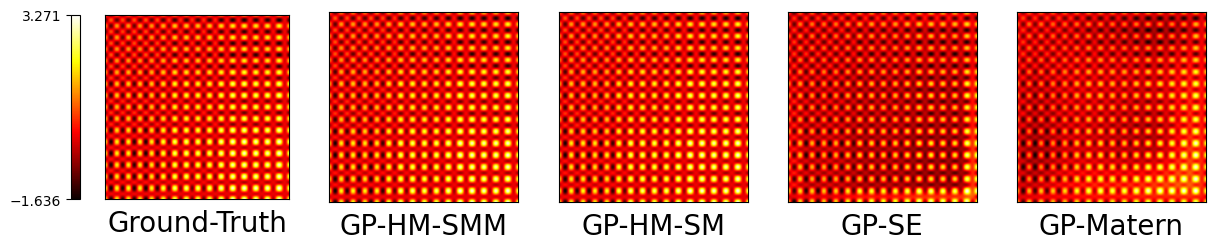

In [10]:
# allencahn_2d-mix-sinco
kernel_list = ['Matern52_Cos_1d','SE_Cos_1d','SE_1d','Matern52_1d']
label_list = ['GP-HM-SMM','GP-HM-SM','GP-SE','GP-Matern']

pred_list = []

save_name ='llk_weight-200.0-nu-1-Q-30-epoch-3000000-lr-0.0100-freqscale=30-logdet-1'

for kernel_name in kernel_list:
    prefix ='../result_log/allencahn_2d-mix-sincos/kernel_%s/epoch_3000000/Q30/'%(kernel_name)

    model, preds,log_dict = load_and_predict_2d(prefix, save_name)
    preds = np.nan_to_num(preds)
    pred_list.append(preds)

pred_all = np.concatenate(
    pred_list
)

pred_min = pred_all.min()
pred_max = pred_all.max()
# err_norm = err_max-err_min

imgs = []

fig, axs = plt.subplots(1,5, figsize=(15,3),gridspec_kw={'width_ratios': [1.3, 1,1,1,1]})


img =axs[0].imshow(model.ute, cmap="hot")
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel('Ground-Truth',fontsize=20)

imgs.append(img)

for i, kernel_name in enumerate(kernel_list):
    img = axs[i+1].imshow(pred_list[i], cmap="hot")
    # img = axs[i+1].imshow(pred_list[i], cmap="jet")

    axs[i+1].set_xticks([])
    axs[i+1].set_yticks([])
    axs[i+1].set_xlabel(label_list[i],fontsize=20)

    imgs.append(img)

fig.colorbar(
    imgs[0], 
    ax=axs[0],
    location='left', 
    ticks=[model.ute.min(), model.ute.max()],
    shrink=0.8,
)
# fig.colorbar(
#     imgs[2], 
#     ax=axs[1:5],
#     location='top', 
#     ticks=[pred_min, pred_max],
#     shrink=0.2,
# )
equation_name =model.trick_paras['equation']
prefix = '../figs/' + equation_name + '/'
if not os.path.exists(prefix):
    os.makedirs(prefix)
plt.savefig(prefix + 'pred_sum.pdf', dpi=300, bbox_inches='tight')
plt.savefig(prefix + 'pred_sum.png', dpi=300, bbox_inches='tight')